In [40]:
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_json('inputs/data.json')
data.head()

,rasa_nlu_data
common_examples,"[{'text': 'Can you tell me about television', ..."


In [25]:
f = open('inputs/data.json')
data = json.load(f)
data

{'rasa_nlu_data': {'common_examples': [{'text': 'Can you tell me about television',
    'intent': 'product_info',
    'entities': [{'start': 22,
      'end': 32,
      'value': 'television',
      'entity': 'product'}]},
   {'text': 'tell me about refrigrator',
    'intent': 'product_info',
    'entities': [{'start': 15,
      'end': 25,
      'value': 'efrigrator',
      'entity': 'product'}]},
   {'text': 'i want to know about fridge',
    'intent': 'product_info',
    'entities': [{'start': 21,
      'end': 27,
      'value': 'fridge',
      'entity': 'product'}]},
   {'text': 'details about washine machine',
    'intent': 'product_info',
    'entities': [{'start': 14,
      'end': 29,
      'value': 'washine machine',
      'entity': 'product'}]},
   {'text': 'specification about television',
    'intent': 'product_info',
    'entities': [{'start': 20,
      'end': 30,
      'value': 'television',
      'entity': 'product'}]},
   {'text': 'tell me about', 'intent': 'product_info', 

In [ ]:
print(i['entities'])

In [26]:
from tqdm.notebook import tqdm
text = []
intent = []
start = []
end = []
value = []
entity = []
for i in data['rasa_nlu_data']['common_examples']:
    text.append(i['text'])
    intent.append(i['intent'])
    if len(i['entities'])>0:
        start.append(i['entities'][0]['start'])
        end.append(i['entities'][0]['end'])
        value.append(i['entities'][0]['value'])
        entity.append(i['entities'][0]['start'])
    else:
        start.append('NaN')
        end.append('NaN')
        value.append('NaN')
        entity.append('NaN')
data = pd.DataFrame(columns=['Text', 'intent', 'start', 'end', 'value', 'entity'])
data['Text'] = text
data['intent'] = intent
data['start'] = start
data['end'] = end
data['value'] = value
data['entity'] = entity
data.head()

,Text,intent,start,end,value,entity
0,Can you tell me about television,product_info,22,32,television,22
1,tell me about refrigrator,product_info,15,25,efrigrator,15
2,i want to know about fridge,product_info,21,27,fridge,21
3,details about washine machine,product_info,14,29,washine machine,14
4,specification about television,product_info,20,30,television,20


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
def examplesDist_plot(data, column):
    """
    :param log_pd: data as the rasa nlu data,
    :return: None, calculate value count per intent and plots that using matplotlib
    """
    plt.figure(figsize = (10,5))
    sns.countplot(x = data[column], palette=("Accent"))
    plt.ylabel("Number of examples per intent")
    plt.xlabel("Intents")
    plt.xticks(rotation=90)
    plt.title("Number of examples per intent")
    
    plt.show()

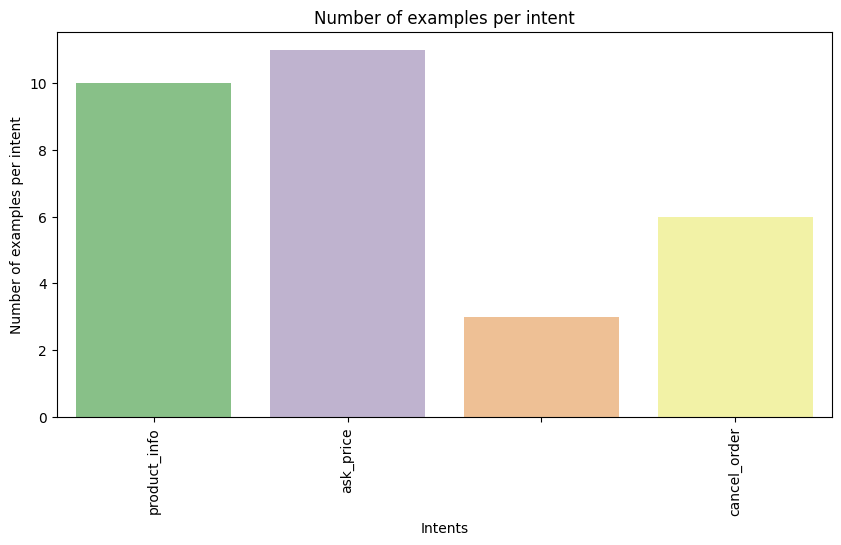

In [60]:
examplesDist_plot(data, column='intent')

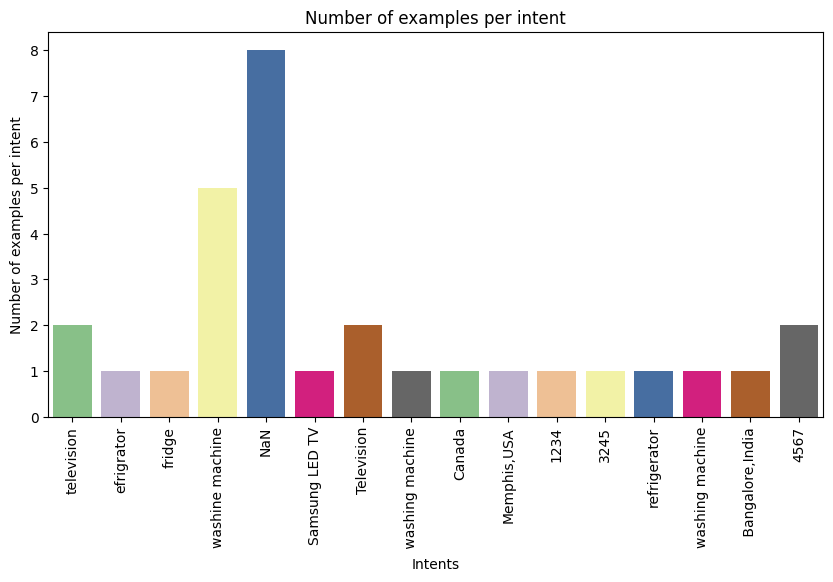

In [61]:
examplesDist_plot(data, column='value')